In [14]:
import mtcnn
from PIL import Image
import numpy as np

In [7]:
import os
os.getcwd()

'c:\\Sid\\MTech\\Sem 4\\NLP\\Project\\Notebooks'

In [38]:
import matplotlib.pyplot as pyplot
#pixels = pyplot.imread("../Datasets/constraint22_dataset_uspolitics/images/memes_14.png")
im = Image.open("../Datasets/constraint22_dataset_uspolitics/images/memes_13.png")

im.show()

In [46]:
import cv2
im = cv2.imread('../Datasets/constraint22_dataset_uspolitics/images/memes_13.png')
print(type(im))
cv2.imshow('image', im)
cv2.waitKey(0)       
 
# Destroying present windows on screen
cv2.destroyAllWindows()

<class 'numpy.ndarray'>


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1268: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [53]:
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    #pixels = pyplot.imread(filename)[:,:,:3]
    pixels = cv2.imread(filename)
    print(pixels.shape)
    # create the detector, using default weights
    detector = mtcnn.MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

(942, 942, 3)


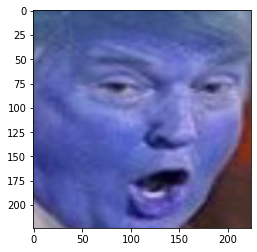

In [56]:
pixels = extract_face('../Datasets/constraint22_dataset_uspolitics/images/memes_8285.png')
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()

In [57]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

pixels = pixels.astype('float32')
samples = np.expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

b' Chris_Squire': 58.604%
b' Irmelin_Indenbirken': 2.067%
b' Les_Dennis': 1.621%
b' Mark_Emmert': 1.410%
b' Gary_Roughead': 1.359%
